Beniditto Eka Viyantyo - 220711605

Kelompok H20

Klasifikasi Jamur

AxelNet

In [1]:
import tensorflow as tf
import cv2
import numpy as np
from matplotlib import pyplot as plt 
#load data
data_dir = r"D:\Ditto\Kuliah\Matkul\Semester 5\ML\Pertemuan 16(UAS)\UAS\datasetUASML\train_data" 
#Randomize data yang telah di load sekaligus resize menjadi 180 x 180
data = tf.keras.utils.image_dataset_from_directory(data_dir, seed = 123, image_size=(180, 180), batch_size=16)
print(data.class_names)

class_names = data.class_names


Found 300 files belonging to 3 classes.
['JamurKuping', 'JamurReishi', 'JamurShitake']


In [2]:
img_size = 180
batch = 32
validation_split = 0.1

dataset = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    seed=123,
    image_size=(img_size, img_size),
    batch_size=batch
)

Found 300 files belonging to 3 classes.


In [3]:
total_count = len(dataset)
val_count = int(total_count * validation_split)
train_count = total_count - val_count

print("Total Images:", total_count)
print("Train Images:", train_count)
print("Validation Images:", val_count)

train_ds = dataset.take(train_count)
val_ds = dataset.skip(train_count)


Total Images: 10
Train Images: 9
Validation Images: 1


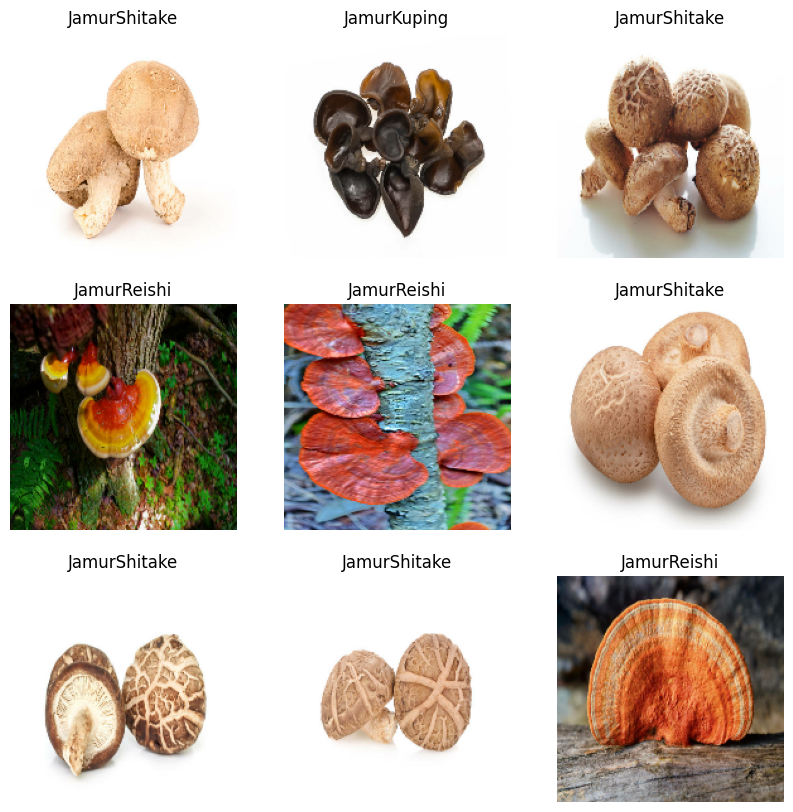

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))

#tampilkan untuk memastikan data sudah di load
for images, labels in train_ds.take(1):
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(class_names[labels[i]])
        plt.axis('off')
        
###Terdapat code yang hilang disini! lihat modul untuk menemukanya
###Pastikan nama kelas berhasil untuk ditampilkan

In [5]:
for images, labels in train_ds.take(1):
    images_array = np.array(images)
    print(images_array.shape)
    
#loop untuk mengecek atribut gambar(jumlah, tinggi, lebar, dan channel(RGB))

(32, 180, 180, 3)


C:\Users\lenovo\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


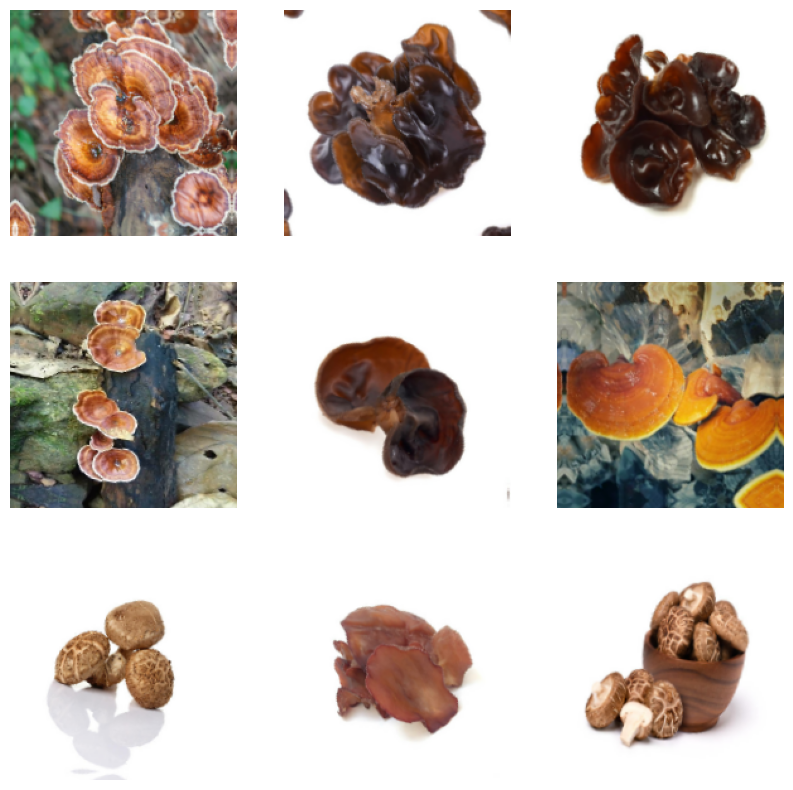

In [6]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

Tuner = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=Tuner)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=Tuner)

#Augmentasi data dengan menggunakan Sequential
data_augmentation = Sequential([
    layers.RandomFlip('horizontal', input_shape=(img_size, img_size, 3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)
])

plt.figure(figsize=(10, 10))
#Lihat data setelah di augmentasi
for images, labels in train_ds.take(1):
    images = data_augmentation(images)
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.axis('off')


In [7]:
import tensorflow as tf
import keras

import keras._tf_keras.keras.backend as K
from keras._tf_keras.keras.models import Model
from keras._tf_keras.keras.layers import Input, Dense, Conv2D
from keras._tf_keras.keras.layers import Flatten, MaxPool2D, AvgPool2D
from keras._tf_keras.keras.layers import Concatenate, Dropout

from keras._tf_keras.keras.models import load_model

#membuat model from scratch 
def alexnet(input_shape, n_classes):
    input_layer = Input(input_shape)
    x = Conv2D(96, (11, 11), strides=4, activation='relu')(input_layer)
    x = MaxPool2D(pool_size=(3, 3), strides=2)(x)

    x = Conv2D(256, (5, 5), padding='same', activation='relu')(x)
    x = MaxPool2D(pool_size=(3, 3), strides=2)(x)

    x = Conv2D(384, (3, 3), padding='same', activation='relu')(x)
    x = Conv2D(384, (3, 3), padding='same', activation='relu')(x)
    x = Conv2D(256, (3, 3), padding='same', activation='relu')(x)
    x = MaxPool2D(pool_size=(3, 3), strides=2)(x)

    x = Flatten()(x)
    x = Dense(4096, activation='relu')(x)
    x = Dropout(0.5)(x)
    x = Dense(4096, activation='relu')(x)
    x = Dropout(0.5)(x)
    output = Dense(n_classes, activation='softmax')(x)

    model = Model(input_layer, output)
    return model

#Pastikan input shae dan jumlah kelas sesuai 
input_shape = (img_size, img_size, 3)
n_classes = len(class_names)

#Clear Cache Keras menggunakan clear session
tf.keras.backend.clear_session()
model = alexnet(input_shape, n_classes)
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 43, 43, 96)     │        34,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 21, 21, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 21, 21, 256)    │       614,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 10, 10, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 10, 10, 384)    │       885,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 10, 10, 384)    │     1,327,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 10, 10, 256)    │       884,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │        12,291 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 37,322,115 (142.37 MB)

 Trainable params: 37,322,115 (142.37 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
#Coimpile dengan optimizer adam
model.compile(
    optimizer=Adam(),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

#buat early stopping
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, mode='max')

#fit validation data ke dalam model
history = model.fit(
    train_ds,
    epochs=30,
    validation_data=val_ds,
    callbacks=[early_stopping]
)


Epoch 1/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 9s 765ms/step - accuracy: 0.3398 - loss: 348.1550 - val_accuracy: 0.4167 - val_loss: 0.8995
Epoch 2/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 6s 686ms/step - accuracy: 0.3513 - loss: 1.0176 - val_accuracy: 0.7500 - val_loss: 0.9050
Epoch 3/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 6s 675ms/step - accuracy: 0.4916 - loss: 1.0391 - val_accuracy: 0.8333 - val_loss: 0.6719
Epoch 4/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 6s 675ms/step - accuracy: 0.5325 - loss: 0.9659 - val_accuracy: 0.8333 - val_loss: 0.6528
Epoch 5/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 6s 678ms/step - accuracy: 0.5158 - loss: 1.0294 - val_accuracy: 0.7500 - val_loss: 0.5991
Epoch 6/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 6s 677ms/step - accuracy: 0.7093 - loss: 0.7507 - val_accuracy: 0.5833 - val_loss: 0.4918
Epoch 7/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 6s 680ms/step - accuracy: 0.6988 - loss: 0.6482 - val_accuracy: 0.7500 - val_loss: 0.4903
Epoch 8/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 6s 704ms/step - accuracy: 0.7493 - loss: 0.5724 - val_accuracy: 0.8333 - val_los

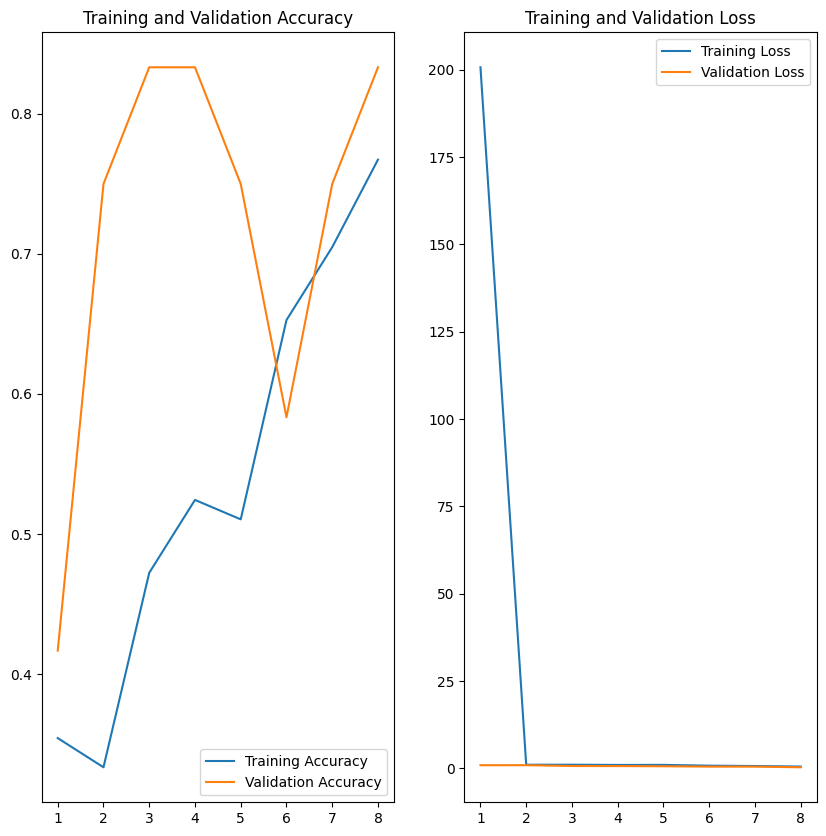

In [9]:
#buat plot dengan menggunakan history supaya jumlahnya sesuai epoch yang dilakukan
ephocs_range = range(1, len(history.history['loss']) + 1)
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.plot(ephocs_range, history.history['accuracy'], label='Training Accuracy')
plt.plot(ephocs_range, history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(ephocs_range, history.history['loss'], label='Training Loss')
plt.plot(ephocs_range, history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [10]:
model.save('axelnet13.h5')

In [16]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from PIL import Image

# Load the trained model
model = load_model(r'D:\Ditto\Kuliah\Matkul\Semester 5\ML\Pertemuan 16(UAS)\fixaxelnet.h5')  # Ganti dengan path model Anda
class_names = ['JamurKuping', 'JamurReishi', 'JamurShitake']

# Function to classify images and save the original image
def classify_images(image_path, save_path='predicted_image.jpg'):
    try:
        # Load and preprocess the image
        input_image = tf.keras.utils.load_img(image_path, target_size=(180, 180))
        input_image_array = tf.keras.utils.img_to_array(input_image)
        input_image_exp_dim = tf.expand_dims(input_image_array, 0)  # Add batch dimension

        # Predict
        predictions = model.predict(input_image_exp_dim)
        result = tf.nn.softmax(predictions[0])
        class_idx = np.argmax(result)
        confidence = np.max(result) * 100

        # Display prediction and confidence in notebook
        print(f"Prediksi: {class_names[class_idx]}")
        print(f"Confidence: {confidence:.2f}%")

        # Save the original image (without text)
        input_image = Image.open(image_path)
        input_image.save(save_path)

        return f"Prediksi: {class_names[class_idx]} dengan confidence {confidence:.2f}%. Gambar asli disimpan di {save_path}."
    except Exception as e:
        return f"Terjadi kesalahan: {e}"

# Contoh penggunaan fungsi
result = classify_images(r'D:\Ditto\Kuliah\Matkul\Semester 5\ML\Pertemuan 16(UAS)\UAS\datasetUASML\test_data\reishi\reishi (5).jpg', save_path='reishi.jpg')
print(result)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
Prediksi: JamurReishi
Confidence: 57.61%
Prediksi: JamurReishi dengan confidence 57.61%. Gambar asli disimpan di reishi.jpg.


Found 30 files belonging to 3 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


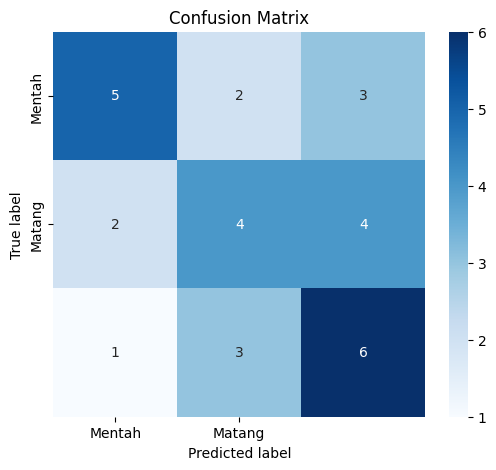

Confusion Matrix:
 [[5 2 3]
 [2 4 4]
 [1 3 6]]
Akurasi: 0.5
Presisi: [0.625      0.44444444 0.46153846]
Recall: [0.5 0.4 0.6]
F1 Score: [0.55555556 0.42105263 0.52173913]


In [50]:
import tensorflow as tf
from tensorflow.keras.models import load_model
import seaborn as sns
import matplotlib.pyplot as plt

#memuat model yang telah dilatih sebelumnya
mobileNet_model = load_model(r'D:\Ditto\Kuliah\Matkul\Semester 5\ML\Pertemuan 16(UAS)\fixaxelnet.h5')#gunakan path masing masing ya

#memuat data test yang sebenarnya
test_data = tf.keras.preprocessing.image_dataset_from_directory(
    r'D:\Ditto\Kuliah\Matkul\Semester 5\ML\Pertemuan 16(UAS)\UAS\datasetUASML\test_data', #direktori data uji
    labels='inferred', #label otomatis dari subfolder yang ada
    label_mode='categorical',  #menghasilkan label dalam bentuk one-hot encoding
    batch_size=32, #ukuran batch untuk pemrosesan
    image_size=(180, 180) #ukuran gambar yang akan diproses
)

#prediksi model
y_pred = mobileNet_model.predict(test_data)
y_pred_class = tf.argmax(y_pred, axis=1)  #konversi ke kelas prediksi

#ekstrak label sebenarnya dari test_data dan konversi ke bentuk indeks kelas
true_labels = [] #menyimpan label asli dalam bentuk indeks
for _, labels in test_data:
    true_labels.extend(tf.argmax(labels, axis=1).numpy())  #konversi one-hot ke indeks kelas
true_labels = tf.convert_to_tensor(true_labels) #mengkonversi list ke tensor untuk perhitungan

#membuat confusion matrix untuk evaluasi
conf_mat = tf.math.confusion_matrix(true_labels, y_pred_class)

#menghitung akurasi berdasarkan confusion matrix
accuracy = tf.reduce_sum(tf.linalg.diag_part(conf_mat)) / tf.reduce_sum(conf_mat)

#mnghitung presisi dan recall dari confusion matrix
precision = tf.linalg.diag_part(conf_mat) / tf.reduce_sum(conf_mat, axis=0)
recall = tf.linalg.diag_part(conf_mat) / tf.reduce_sum(conf_mat, axis=1)

#menghitung F1 Score
f1_score = 2 * (precision * recall) / (precision + recall)

#visualisasi Confusion Matrix
plt.figure(figsize=(6, 5)) #mengatur ukuran gambar
sns.heatmap(conf_mat.numpy(), annot=True, fmt='d', cmap='Blues', #annot=True untuk menampilkan angka di dalam setiap sel matriks                                    #fmt='d' untuk menampilkan bilangan bulat tanpa desimal
            xticklabels=["Mentah", "Matang"], yticklabels=["Mentah", "Matang"])
plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

# Menampilkan hasil
print("Confusion Matrix:\n", conf_mat.numpy())
print("Akurasi:", accuracy.numpy())
print("Presisi:", precision.numpy())
print("Recall:", recall.numpy())
print("F1 Score:", f1_score.numpy())
